In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [ ]:
df.shape

(251079, 15)

In [ ]:
df.sample(10)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
207048,207048,toyota,Toyota C-HR,grey,04/2017,2017,16995,85,116,Manual,Petrol,"5,9 l/100 km",135 g/km,33750.0,1.2 Turbo Lounge Navi SHZ Rückfahrkamera
53796,53796,fiat,Fiat Ducato,white,04/2016,2016,21999,110,150,Manual,Diesel,"5,9 l/100 km",- (g/km),92250.0,Ducato L1H1 S
100439,100439,mazda,Mazda MX-30,grey,08/2020,2020,26290,81,110,Automatic,Electric,NaN,200 km Reichweite,31500.0,"35,5 kWh 140 PS e-SKYACTIV EV KOM-P IV-P PRE-P..."
602,602,alfa-romeo,Alfa Romeo Giulia,red,09/2017,2017,49750,375,510,Automatic,Petrol,"8,2 l/100 km",189 g/km,54000.0,2.9 V6 Quadrifoglio H&K/Carbon/DAB
104412,104412,mercedes-benz,Mercedes-Benz C 200,blue,06/2004,2004,3999,90,122,Automatic,Diesel,"5,9 l/100 km",156 g/km,139500.0,"A -Klasse A 170, erst 54000 km ! aus 1. Hand !"
217511,217511,volkswagen,Volkswagen Touran,silver,05/2006,2006,1700,75,102,Automatic,Petrol,8 l/100 km,- (g/km),232000.0,1.6 Goal
164746,164746,porsche,Porsche Cayenne,black,07/2008,2008,16450,368,500,Automatic,Petrol,"14,9 l/100 km",- (g/km),263500.0,Turbo
9357,9357,audi,Audi A4,silver,08/2014,2014,11500,200,272,Automatic,Petrol,"7,8 l/100 km",0 g/km,71849.0,AVANT 3.0TFSi Q 3x S LINE/AHK/NAV+/XENON-PLUS
165242,165242,porsche,Porsche Panamera,grey,11/2014,2014,34890,221,300,Automatic,Diesel,"6,4 l/100 km",170 g/km,159000.0,MEMORY-BOSE-SCHIEBEDACH-ACC-KAME-LUFT
116996,116996,mercedes-benz,Mercedes-Benz S 500,white,02/2015,2015,40400,335,455,Automatic,Petrol,"8,7 l/100 km",202 g/km,135000.0,AMG Line 4M+Head up+Panorama+20+360


In [ ]:
df['year'].value_counts()

,count
year,
2019,29225
2018,24095
2023,21097
2022,20653
2017,18940
...,...
05/2015,1
05/2016,1
07/2018,1


In [ ]:
df['price_in_euro'].dtype

dtype('O')

In [ ]:
df[df['price_in_euro'].str.contains('[A-Za-z]', na=False)]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
2400,2400,audi,Audi A4,grey,Manual,Petrol,KLIMAAUTOMATIK*,"7,8 l/100 km",75,Manual,07/2004,187 g/km,2004,2460.0,Avant 1.6 *TÜV 09/23
2743,2743,audi,Audi A4,silver,8449,Automatic,Automatik,2005,194 g/km,Automatic,74.194 km,Petrol,11/2005,NaN,Lim. 2.0
5297,5297,audi,Audi A1,blue,8999,Manual,6-Gang,2011,126 g/km,Manual,110.250 km,Petrol,04/2011,NaN,1.4 TFSI Ambition
9616,9616,audi,Audi A1,white,Manual,Petrol,XEN AAC SHZ FSP APS 5TRG,"5,4 l/100 km",90,Manual,06/2014,128 g/km,2014,12250.0,Sportback Sportline
12206,12206,audi,Audi A6,black,Manual,Diesel,NAVplus LEDER PANO ALC,"4,6 l/100 km",140,Manual,12/2016,119 g/km,2016,21250.0,Avant 2.0 TDI ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241462,241462,volkswagen,Volkswagen Passat Variant,silver,Manual,Diesel,Navi uvm,4 l/100 km,110,Manual,06/2020,104 g/km,2020,20900.0,2.0 TDI SCR - Business Premium Paket
242569,242569,volkswagen,Volkswagen up!,red,18.200 km,06/2021,PDC,112 g/km,"4,9 l/100 km",Manual,Manual,2021,Petrol,NaN,GTI - KAMERA
242579,242579,volkswagen,Volkswagen up!,red,8.500 km,07/2021,Beats-Soundsystem,112 g/km,"4,9 l/100 km",Manual,Manual,2021,Petrol,NaN,GTI - KAMERA
246113,246113,volkswagen,Volkswagen up!,red,Manual,Petrol,SHZ,"4,9 l/100 km",85,Manual,03/2023,112 g/km,2023,23590.0,GTI - Beats SOUNDSYSTEM. KAMERA


In [ ]:
df['price_in_euro'].value_counts()

,count
price_in_euro,
19990,1592
16990,1404
17990,1373
15990,1316
14990,1303
...,...
41230,1
19070,1
36831,1


In [ ]:
df = df.drop(df[df['price_in_euro'].str.contains('[a-zA-Z]', na=False)].index).reset_index(drop=True)
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250875,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
250876,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
250877,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
250878,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
brand,0
model,0
color,166
registration_date,0
year,0
price_in_euro,0
power_kw,128
power_ps,128
transmission_type,0


In [ ]:
df[df['color'].isna()]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
10330,10334,audi,Audi A1,NaN,05/2015,2015,11950,63,86,Manual,Petrol,"5,1 l/100 km",121 g/km,63000.0,Sportback 1.2 TFSI Attraction Klima Sitzheizung
10331,10335,audi,Audi A1,NaN,05/2015,2015,11950,63,86,Manual,Petrol,"5,1 l/100 km",121 g/km,63000.0,Sportback 1.2 TFSI Attraction Klima Sitzheizung
13644,13651,audi,Audi A3,NaN,12/2017,2017,16830,81,110,Automatic,Petrol,"5,4 l/100 km",124 g/km,100976.0,Sportback sport g-tron 1.4 TFSI S tronic
13645,13652,audi,Audi A3,NaN,12/2017,2017,16830,81,110,Automatic,Petrol,"5,4 l/100 km",124 g/km,100976.0,Sportback sport g-tron 1.4 TFSI S tronic
17190,17198,audi,Audi A3,NaN,03/2019,2019,23495,110,150,Manual,Petrol,"5,3 l/100 km",120 g/km,33534.0,Sportback sport 35 TFSI Nav/LED/sound/SHZ/EPH/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248799,248998,volvo,Volvo XC40,NaN,06/2019,2019,23950,120,163,Manual,Petrol,"6,2 l/100 km",141 g/km,65510.0,Momentum T3 163PS Schaltgetriebe AHK Navi Soun...
250150,250349,volvo,Volvo XC60,NaN,02/2021,2021,39950,145,197,Automatic,Diesel,"4,9 l/100 km",129 g/km,25110.0,Momentum Pro 2WD B4 Diesel EU6d Winter-Paket P...
250151,250350,volvo,Volvo XC60,NaN,02/2021,2021,39950,145,197,Automatic,Diesel,"4,9 l/100 km",129 g/km,25110.0,Momentum Pro 2WD B4 Diesel EU6d Winter-Paket P...
250546,250745,volvo,Volvo XC60,NaN,01/2022,2022,48950,145,197,Automatic,Diesel,"5,5 l/100 km",144 g/km,19970.0,R Design AWD B4 Diesel EU6d Panoramadach Stand...


In [ ]:
df = df.dropna(subset=['color'])

In [ ]:
df[df['power_kw'].isna()]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
1396,1396,alfa-romeo,Alfa Romeo Tonale,black,01/2023,2023,29970,NaN,NaN,Automatic,Petrol,"5,9 l/100 km",134 g/km,15.0,SUPER 1.5 T 130PS 48-Hybrid 15KW
1417,1417,alfa-romeo,Alfa Romeo Tonale,black,01/2023,2023,29970,NaN,NaN,Automatic,Hybrid,"5,9 l/100 km",134 g/km,5.0,SUPER 1.5 T 130PS 48-Hybrid 15KW
1961,1961,audi,Audi TT,silver,07/2001,2001,13900,NaN,NaN,Manual,Other,NaN,- (g/km),154920.0,Roadster 1.8T quattro Mokassin-Naht
19291,19299,audi,Audi RS6,silver,06/2020,2020,194999,NaN,NaN,Automatic,Petrol,"11,7 l/100 km",268 g/km,29874.0,Avant 4.0 TFSI quat/1064ps*/HGP/Keramik/VOLL
20363,20371,audi,Audi A6,silver,03/2021,2021,34880,NaN,NaN,Automatic,Diesel,"4,9 l/100 km",128 g/km,74373.0,Avant design 40 TDI Aut quatt CAM AHK LED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230749,230938,volkswagen,Volkswagen Golf,white,06/2015,2015,14400,NaN,NaN,Manual,Other,NaN,- (g/km),90696.0,Caddy Kasten EcoProfi 1-Hand 107640Km Klima
232733,232923,volkswagen,Volkswagen Passat Variant,silver,03/2016,2016,14590,NaN,NaN,Manual,Diesel,"4,1 l/100 km",107 g/km,189000.0,Highline *LED_Keyless_Kamera*
238154,238348,volkswagen,Volkswagen T6 Transporter,blue,12/2019,2019,55990,NaN,NaN,Manual,Diesel,"6,9 l/100 km",179 g/km,48500.0,Reisemobil Sunvan FZG223 2.0 TDI | Klima | RFK
239665,239859,volkswagen,Volkswagen T6.1 Kombi,silver,12/2019,2019,55900,NaN,NaN,Manual,Diesel,"6,2 l/100 km",164 g/km,40000.0,Reisemobil Sunvan FZG225 2.0 TDI | Klima eFH.


In [ ]:
df = df.dropna(subset=['power_kw'])

In [ ]:
df[df['fuel_consumption_l_100km'].isna()]

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
18,18,alfa-romeo,Alfa Romeo GTV,red,03/1997,1997,9980,148,201,Manual,Petrol,NaN,- (g/km),168791.0,2.0 V6 TB - Leder - 2.Hand
22,22,alfa-romeo,Alfa Romeo Spider,black,07/1997,1997,10500,141,192,Manual,Petrol,NaN,- (g/km),194000.0,"3,0 V6 12V"
27,27,alfa-romeo,Alfa Romeo,black,09/1997,1997,99900,152,207,Manual,Petrol,NaN,- (g/km),72260.0,RZ Zagato Spider | NR.172 | SAMMLER | IL MOSTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250849,251048,volvo,Volvo C40,black,01/2023,2023,51990,170,231,Automatic,Electric,NaN,0 g/km,2106.0,Recharge Single Motor Plus AHK Sitzhzg.
250857,251056,volvo,Volvo C40,black,05/2023,2023,60520,170,231,Automatic,Electric,NaN,400 km Reichweite,3000.0,Ultimate 2WD Recharge Pure Electric
250875,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
250878,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [ ]:
df = df.dropna(subset=['fuel_consumption_l_100km'])

In [ ]:
df = df.dropna(subset=['mileage_in_km'])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 223733 entries, 0 to 250877
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                223733 non-null  int64  
 1   brand                     223733 non-null  object 
 2   model                     223733 non-null  object 
 3   color                     223733 non-null  object 
 4   registration_date         223733 non-null  object 
 5   year                      223733 non-null  object 
 6   price_in_euro             223733 non-null  object 
 7   power_kw                  223733 non-null  object 
 8   power_ps                  223733 non-null  object 
 9   transmission_type         223733 non-null  object 
 10  fuel_type                 223733 non-null  object 
 11  fuel_consumption_l_100km  223733 non-null  object 
 12  fuel_consumption_g_km     223733 non-null  object 
 13  mileage_in_km             223733 non-null  float6

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Unnamed: 0,mileage_in_km
count,223733.000000,2.237330e+05
mean,125621.143211,8.753142e+04
std,72797.114286,7.913558e+04
min,0.000000,0.000000e+00
25%,62729.000000,2.670600e+04
50%,125437.000000,7.028200e+04
75%,188995.000000,1.300000e+05
max,251076.000000,3.800000e+06


In [ ]:
df['year'] = df['year'].astype(int)
df['price_in_euro'] = df['price_in_euro'].astype(int)
df['power_kw'] = df['power_kw'].astype(int)
df['power_ps'] = df['power_ps'].astype(int)
df['year'] = df['year'].astype(int)

In [ ]:
df['transmission_type'].value_counts()

,count
transmission_type,
Automatic,114123
Manual,108557
Unknown,770
Semi-automatic,283


In [ ]:
df['transmission_type'] = df['transmission_type'].replace({'Unknown': '0', 'Automatic': '1', 'Manual': '2', 'Semi-automatic': '3'})
df['transmission_type'].value_counts()

,count
transmission_type,
1,114123
2,108557
0,770
3,283


In [ ]:
df['color'].value_counts()

,count
color,
black,52906
grey,41861
white,35440
silver,31068
blue,28513
red,18912
brown,4016
green,2980
orange,2962


In [ ]:
df['color'] = df['color'].replace({'black': '0', 'grey': '1', 'white': '2', 'silver': '3', 'blue': '4', 'red': '5', 'brown': '6', 'green': '7', 'orange': '8', 'beige': '9', 'yellow': '10', 'bronze': '11', 'gold': '12', 'violet': '13' })
df['color'].value_counts()

,count
color,
0,52906
1,41861
2,35440
3,31068
4,28513
5,18912
6,4016
7,2980
8,2962


In [ ]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,5,10/1995,1995,1300,148,201,2,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
3,3,alfa-romeo,Alfa Romeo Spider,0,07/1995,1995,4900,110,150,2,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,5,11/1996,1996,17950,132,179,2,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,5,04/1996,1996,7900,110,150,2,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,5,12/1996,1996,3500,110,150,2,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250872,251071,volvo,Volvo XC60,3,04/2023,2023,81350,228,310,1,Hybrid,"7,4 l/100 km",167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
250873,251072,volvo,Volvo XC60,3,05/2023,2023,55400,145,197,1,Diesel,"5,6 l/100 km",142 g/km,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
250874,251073,volvo,Volvo XC60,3,03/2023,2023,54500,145,197,1,Diesel,"5,6 l/100 km",142 g/km,5900.0,B4 Autom. Plus Dark Sitzhzg.
250876,251075,volvo,Volvo XC90,2,03/2023,2023,89690,173,235,1,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [ ]:
df['fuel_type'] = df['fuel_type'].replace({'Petrol': '0', 'Diesel': '1', 'Hybrid': '2', 'LPG': '3', 'Electric': '4', 'CNG': '5', 'Diesel Hybrid': '6', 'Other': '7', 'Hydrogen': '8', 'Unknown': '9', 'Ethanol': '10'})
df['fuel_type'].value_counts()

,count
fuel_type,
0,132026
1,78928
2,10312
3,1054
4,471
5,414
6,375
7,87
8,38


In [ ]:
df['fuel_type'].value_counts()

,count
fuel_type,
0,132026
1,78928
2,10312
3,1054
4,471
5,414
6,375
7,87
8,38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223733 entries, 0 to 250877
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                223733 non-null  int64  
 1   brand                     223733 non-null  object 
 2   model                     223733 non-null  object 
 3   color                     223733 non-null  object 
 4   registration_date         223733 non-null  object 
 5   year                      223733 non-null  int64  
 6   price_in_euro             223733 non-null  int64  
 7   power_kw                  223733 non-null  int64  
 8   power_ps                  223733 non-null  int64  
 9   transmission_type         223733 non-null  object 
 10  fuel_type                 223733 non-null  object 
 11  fuel_consumption_l_100km  223733 non-null  object 
 12  fuel_consumption_g_km     223733 non-null  object 
 13  mileage_in_km             223733 non-null  float6

In [ ]:
df = df.drop(df[df['fuel_consumption_l_100km'].str.contains('kg', na=False)].index).reset_index(drop=True)

In [ ]:
df = df.drop(df[df['fuel_consumption_l_100km'].str.contains('-', na=False)].index).reset_index(drop=True)

In [ ]:
df = df.drop(df[df['fuel_consumption_l_100km'].str.contains('kg', na=False)].index).reset_index(drop=True)

In [ ]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace('l/100 km', '', regex=False)  # Удаляем ' l/100 km'
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)  # Заменяем запятую на точку

In [ ]:
df = df.drop(df[df['fuel_consumption_l_100km'].str.contains('km', na=False)].index).reset_index(drop=True)

In [ ]:

df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(float)

In [ ]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace('g/km', '', regex=False)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace(',', '.', regex=False)

In [ ]:
df = df.drop(df[df['fuel_consumption_g_km'].str.contains('-', na=False)].index).reset_index(drop=True)

In [ ]:
df = df.drop(df[df['fuel_consumption_g_km'].str.contains('999', na=False)].index).reset_index(drop=True)

In [ ]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,5,10/1995,1995,1300,148,201,2,0,10.9,260,160500.0,2.0 V6 TB
1,3,alfa-romeo,Alfa Romeo Spider,0,07/1995,1995,4900,110,150,2,0,9.5,225,189500.0,2.0 16V Twin Spark L
2,5,alfa-romeo,Alfa Romeo Spider,5,04/1996,1996,7900,110,150,2,0,9.5,225,47307.0,2.0 16V Twin Spark
3,6,alfa-romeo,Alfa Romeo 145,5,12/1996,1996,3500,110,150,2,0,8.8,210,230000.0,Quadrifoglio
4,7,alfa-romeo,Alfa Romeo 164,0,07/1996,1996,5500,132,179,2,0,13.4,320,168000.0,(3.0) V6 Super
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199695,251071,volvo,Volvo XC60,3,04/2023,2023,81350,228,310,1,2,7.4,167,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
199696,251072,volvo,Volvo XC60,3,05/2023,2023,55400,145,197,1,1,5.6,142,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
199697,251073,volvo,Volvo XC60,3,03/2023,2023,54500,145,197,1,1,5.6,142,5900.0,B4 Autom. Plus Dark Sitzhzg.
199698,251075,volvo,Volvo XC90,2,03/2023,2023,89690,173,235,1,1,7.6,202,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [ ]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199700 entries, 0 to 199699
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                199700 non-null  int64  
 1   brand                     199700 non-null  object 
 2   model                     199700 non-null  object 
 3   color                     199700 non-null  object 
 4   registration_date         199700 non-null  object 
 5   year                      199700 non-null  int64  
 6   price_in_euro             199700 non-null  int64  
 7   power_kw                  199700 non-null  int64  
 8   power_ps                  199700 non-null  int64  
 9   transmission_type         199700 non-null  object 
 10  fuel_type                 199700 non-null  object 
 11  fuel_consumption_l_100km  199700 non-null  float64
 12  fuel_consumption_g_km     199700 non-null  float64
 13  mileage_in_km             199700 non-null  f

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,5,10/1995,1995,1300,148,201,2,0,10.9,260.0,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo Spider,0,07/1995,1995,4900,110,150,2,0,9.5,225.0,189500.0,2.0 16V Twin Spark L
2,alfa-romeo,Alfa Romeo Spider,5,04/1996,1996,7900,110,150,2,0,9.5,225.0,47307.0,2.0 16V Twin Spark
3,alfa-romeo,Alfa Romeo 145,5,12/1996,1996,3500,110,150,2,0,8.8,210.0,230000.0,Quadrifoglio
4,alfa-romeo,Alfa Romeo 164,0,07/1996,1996,5500,132,179,2,0,13.4,320.0,168000.0,(3.0) V6 Super
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199695,volvo,Volvo XC60,3,04/2023,2023,81350,228,310,1,2,7.4,167.0,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
199696,volvo,Volvo XC60,3,05/2023,2023,55400,145,197,1,1,5.6,142.0,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
199697,volvo,Volvo XC60,3,03/2023,2023,54500,145,197,1,1,5.6,142.0,5900.0,B4 Autom. Plus Dark Sitzhzg.
199698,volvo,Volvo XC90,2,03/2023,2023,89690,173,235,1,1,7.6,202.0,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [ ]:
df.nlargest(10, 'price_in_euro')

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
72762,lamborghini,Lamborghini,1,08/2018,2018,5890500,566,770,1,0,16.0,370.0,65.0,CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE
72859,lamborghini,Lamborghini,0,11/2021,2021,3250000,602,818,1,2,14.8,373.0,177.0,Sian
82805,mercedes-benz,Mercedes-Benz SLR,1,01/2007,2007,2490000,478,650,1,0,14.5,348.0,15793.0,722 MSO McLaren Edition 1 of 25 worldwide Nr.12
130071,porsche,Porsche 918,2,06/2014,2014,1990000,652,886,1,2,3.1,72.0,5125.0,Spyder WEISSACH PAKET MAGNESIUM FELGEN
130347,porsche,Porsche 991,2,01/2015,2015,1350000,316,430,1,0,8.9,207.0,27000.0,Carrera GTS Cabrio nur 27.000km Komfortpaket
1331,aston-martin,Aston Martin Vantage,4,06/2022,2022,1170000,515,700,1,0,11.4,298.0,80.0,V12 Speedster 1 of 88
39449,ferrari,Ferrari 599,5,04/2011,2011,1150000,493,670,1,0,17.5,411.0,3800.0,GTO * German delivery * rare color *
39491,ferrari,Ferrari 458,4,07/2015,2015,1045800,445,605,1,0,13.3,307.0,2824.0,Speciale Aperta |Tour de France| 878.824€ n.
28460,bmw,BMW 550,6,07/2018,2018,1010101,294,400,1,1,6.3,165.0,87000.0,M550d xDrive Touring Aut.(Hagelschaden!!!) VB!!!
4361,audi,Audi Q7,0,11/2011,2011,1000000,180,245,1,1,7.4,195.0,143700.0,Q7 3.0 TDI SLine 21Zoll Panorama Standh AHK BOSE


In [ ]:
df = df.drop(df[df['price_in_euro']== 5890500].index).reset_index(drop=True)

In [ ]:
df = df.drop(df[df['price_in_euro']== 3250000].index).reset_index(drop=True)

In [ ]:
df = df.drop(df[df['price_in_euro']== 2490000].index).reset_index(drop=True)

In [ ]:
dff = df

In [ ]:
df = df.drop(columns=['brand'])

In [ ]:
df = df.drop(columns=['offer_description'])

In [ ]:
df = df.drop(columns=['registration_date'])

In [ ]:
df = df.drop(columns=['model'])

In [ ]:
df = df.drop(columns=['color'])

In [ ]:
df

,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,1995,1300,148,201,2,0,10.9,260.0,160500.0
1,1995,4900,110,150,2,0,9.5,225.0,189500.0
2,1996,7900,110,150,2,0,9.5,225.0,47307.0
3,1996,3500,110,150,2,0,8.8,210.0,230000.0
4,1996,5500,132,179,2,0,13.4,320.0,168000.0
...,...,...,...,...,...,...,...,...,...
199692,2023,81350,228,310,1,2,7.4,167.0,60.0
199693,2023,55400,145,197,1,1,5.6,142.0,5000.0
199694,2023,54500,145,197,1,1,5.6,142.0,5900.0
199695,2023,89690,173,235,1,1,7.6,202.0,4900.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199697 entries, 0 to 199696
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      199697 non-null  int64  
 1   price_in_euro             199697 non-null  int64  
 2   power_kw                  199697 non-null  int64  
 3   power_ps                  199697 non-null  int64  
 4   transmission_type         199697 non-null  object 
 5   fuel_type                 199697 non-null  object 
 6   fuel_consumption_l_100km  199697 non-null  float64
 7   fuel_consumption_g_km     199697 non-null  float64
 8   mileage_in_km             199697 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,199697.000000,1.996970e+05,199697.000000,199697.000000,199697.000000,199697.000000,1.996970e+05
mean,2016.597555,2.599089e+04,124.210259,168.961176,6.046388,145.032063,8.172694e+04
std,5.194713,3.211135e+04,69.561721,94.550268,2.621792,47.513555,7.592125e+04
min,1995.000000,1.490000e+02,10.000000,14.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,1.249900e+04,81.000000,110.000000,4.900000,118.000000,2.332200e+04
50%,2018.000000,1.999000e+04,110.000000,150.000000,5.700000,137.000000,6.499000e+04
75%,2020.000000,2.994000e+04,140.000000,190.000000,6.700000,163.000000,1.209780e+05
max,2023.000000,1.990000e+06,735.000000,999.000000,173.000000,950.000000,3.800000e+06


In [ ]:
df.nlargest(30, 'power_kw')

,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
39590,2021,699980,735,999,1,2,12.3,280.0,2332.0
39598,2021,549900,735,999,1,2,7.4,330.0,1000.0
39616,2021,549900,735,999,1,2,7.4,330.0,1000.0
39628,2022,495000,735,999,0,2,12.3,280.0,4500.0
39640,2022,520000,735,999,1,2,12.3,154.0,80.0
39648,2022,469900,735,999,1,2,7.4,204.0,4680.0
39649,2022,575900,735,999,1,0,6.5,169.0,400.0
39663,2023,549980,735,999,1,2,12.3,280.0,95.0
39672,2023,645900,735,999,1,2,7.4,205.0,85.0
39673,2023,495000,735,999,1,2,6.1,154.0,89.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199697 entries, 0 to 199696
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      199697 non-null  int64  
 1   price_in_euro             199697 non-null  int64  
 2   power_kw                  199697 non-null  int64  
 3   power_ps                  199697 non-null  int64  
 4   transmission_type         199697 non-null  object 
 5   fuel_type                 199697 non-null  object 
 6   fuel_consumption_l_100km  199697 non-null  float64
 7   fuel_consumption_g_km     199697 non-null  float64
 8   mileage_in_km             199697 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 13.7+ MB


In [ ]:
df = df.head(10000)

In [ ]:
df['log_price'] = np.log(df['price_in_euro'])

<ipython-input-59-c882f1898c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log(df['price_in_euro'])


In [ ]:
df

,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,log_price
0,1995,1300,148,201,2,0,10.9,260.0,160500.0,7.170120
1,1995,4900,110,150,2,0,9.5,225.0,189500.0,8.496990
2,1996,7900,110,150,2,0,9.5,225.0,47307.0,8.974618
3,1996,3500,110,150,2,0,8.8,210.0,230000.0,8.160518
4,1996,5500,132,179,2,0,13.4,320.0,168000.0,8.612503
...,...,...,...,...,...,...,...,...,...,...
9995,2017,16830,81,110,1,0,5.4,124.0,100976.0,9.730918
9996,2017,34480,185,252,1,0,6.2,141.0,36100.0,10.448135
9997,2017,48685,445,605,1,0,10.0,231.0,122850.0,10.793126
9998,2017,26990,140,190,2,0,5.7,130.0,115000.0,10.203222


In [ ]:
df['year'].value_counts()

,count
year,
2016,1242
2015,1233
2014,1082
2013,861
2012,841
2011,693
2010,505
2009,473
2017,427


In [ ]:
df['year'].min()

1995

In [ ]:
df['power_ps'].describe()

,power_ps
count,10000.000000
mean,209.363800
std,102.404129
min,14.000000
25%,150.000000
50%,179.000000
75%,245.000000
max,799.000000


In [ ]:
df['power_kw'].describe()

,power_kw
count,10000.000000
mean,153.962400
std,75.336571
min,10.000000
25%,110.000000
50%,132.000000
75%,180.000000
max,588.000000


эксплораторный анализ данных

In [ ]:
from sklearn import linear_model
import sklearn

<ipython-input-66-9582e18015e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.log_price)


<Axes: xlabel='log_price', ylabel='Density'>

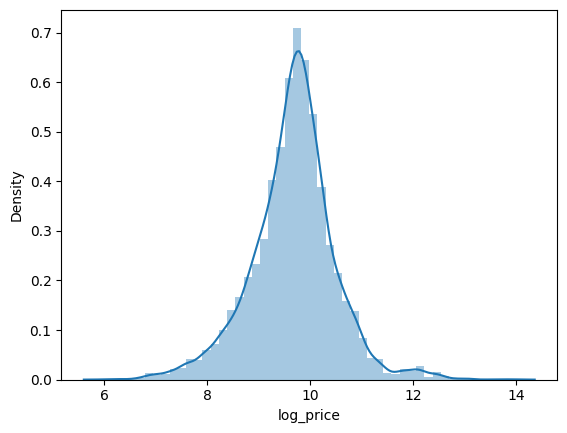

In [ ]:
sns.distplot(df.log_price)

In [ ]:
from sklearn.model_selection import train_test_split

y = df["log_price"]
X = df.drop(columns=["log_price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

numeric_df = X_train.select_dtypes([np.number])
numeric_df_mean = numeric_df.mean()
numeric_features = numeric_df.columns


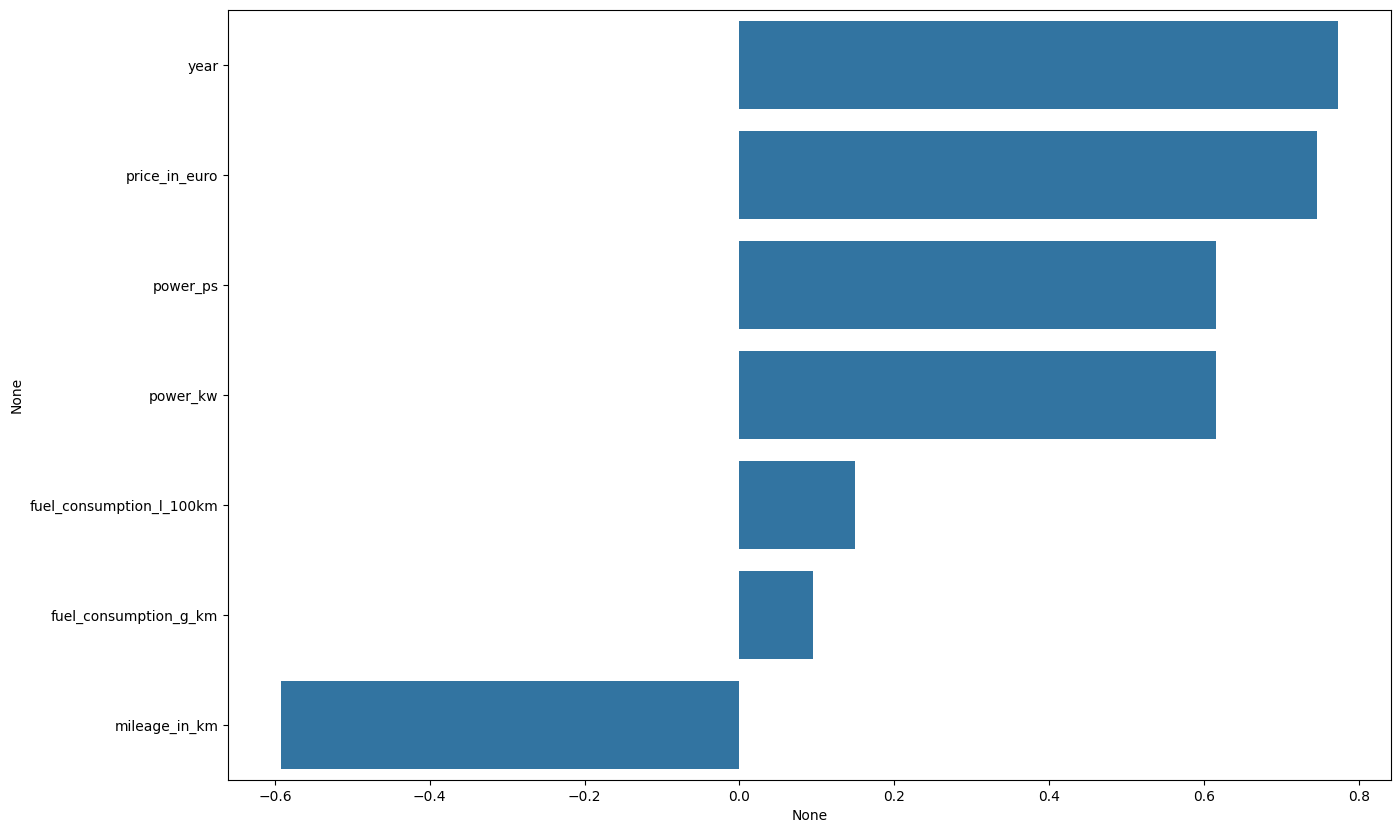

In [ ]:
numeric_df = X_train.select_dtypes([np.number])
numeric_df_mean = numeric_df.mean()
numeric_features = numeric_df.columns

# если пропущенные значения не были заполнены ранее
X_train = X_train.fillna(numeric_df_mean)
X_test = X_test.fillna(numeric_df_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

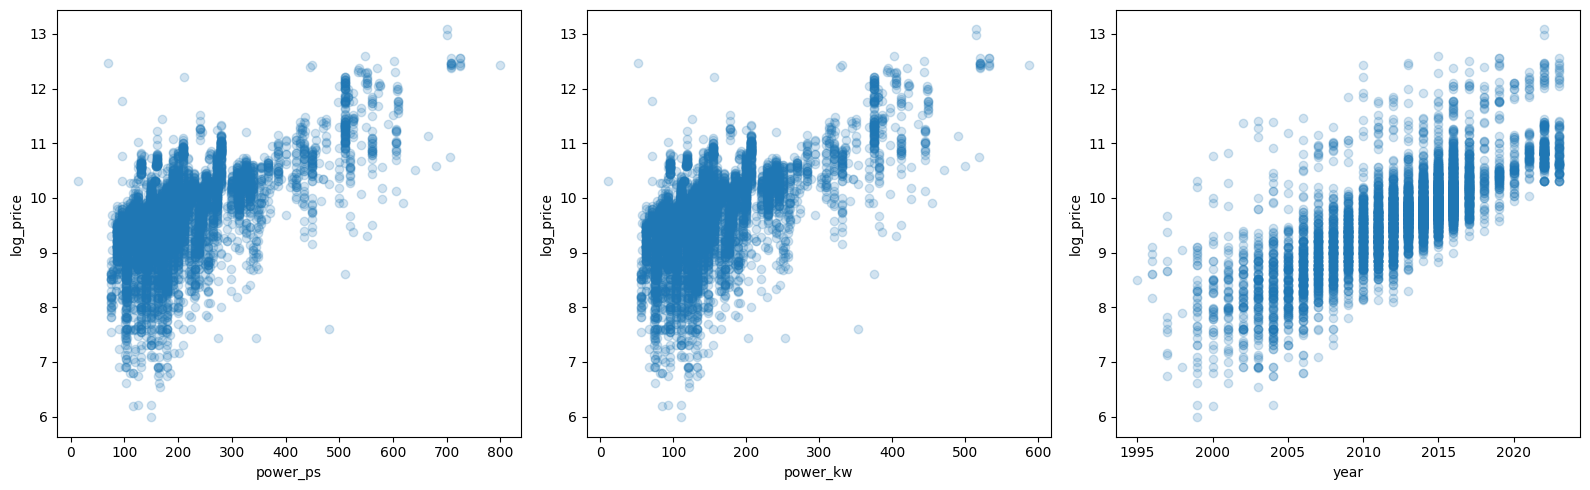

In [ ]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["power_ps", "power_kw", 'year']):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("log_price")
plt.tight_layout()

Text(0, 0.5, 'log_price')

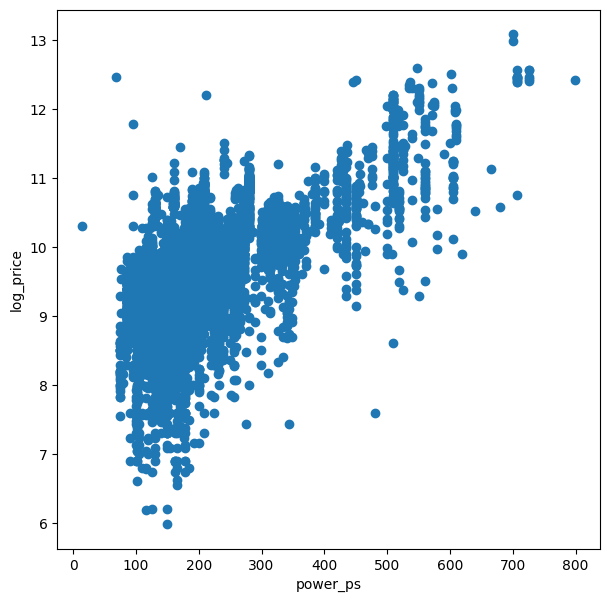

In [ ]:
plt.figure(figsize=(7, 7))
#plt.scatter(X_train.dependents, y_train)
plt.scatter(X_train.power_ps, y_train)

plt.xlabel('power_ps')
plt.ylabel('log_price')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
#1


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = (model.predict(X_test[numeric_features]))
y_train_pred = (model.predict(X_train[numeric_features]))



print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.3501
Train RMSE = 0.3143


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.3140
	-0.3184
	-0.3184
	-0.3121
	-0.3258
	-0.3151
	-0.2896
	-0.3957
	-0.2993
	-0.2986
Mean CV MSE = 0.3187


In [ ]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with best constant = 0.8276
Train RMSE with best constant = 0.8159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
def show_weights(features, weights, means, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=3)
    sorted_weights = sorted(zip(weights, features, means, scales), reverse=True)
    weights, features, means, scales = zip(*sorted_weights)
    features = list(features)

    sns.barplot(y=features, x=list(weights), ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=list(means), ax=axs[1])
    axs[1].set_xlabel("Mean")
    sns.barplot(y=features, x=list(scales), ax=axs[2])
    axs[2].set_xlabel("Scale")
    plt.tight_layout()

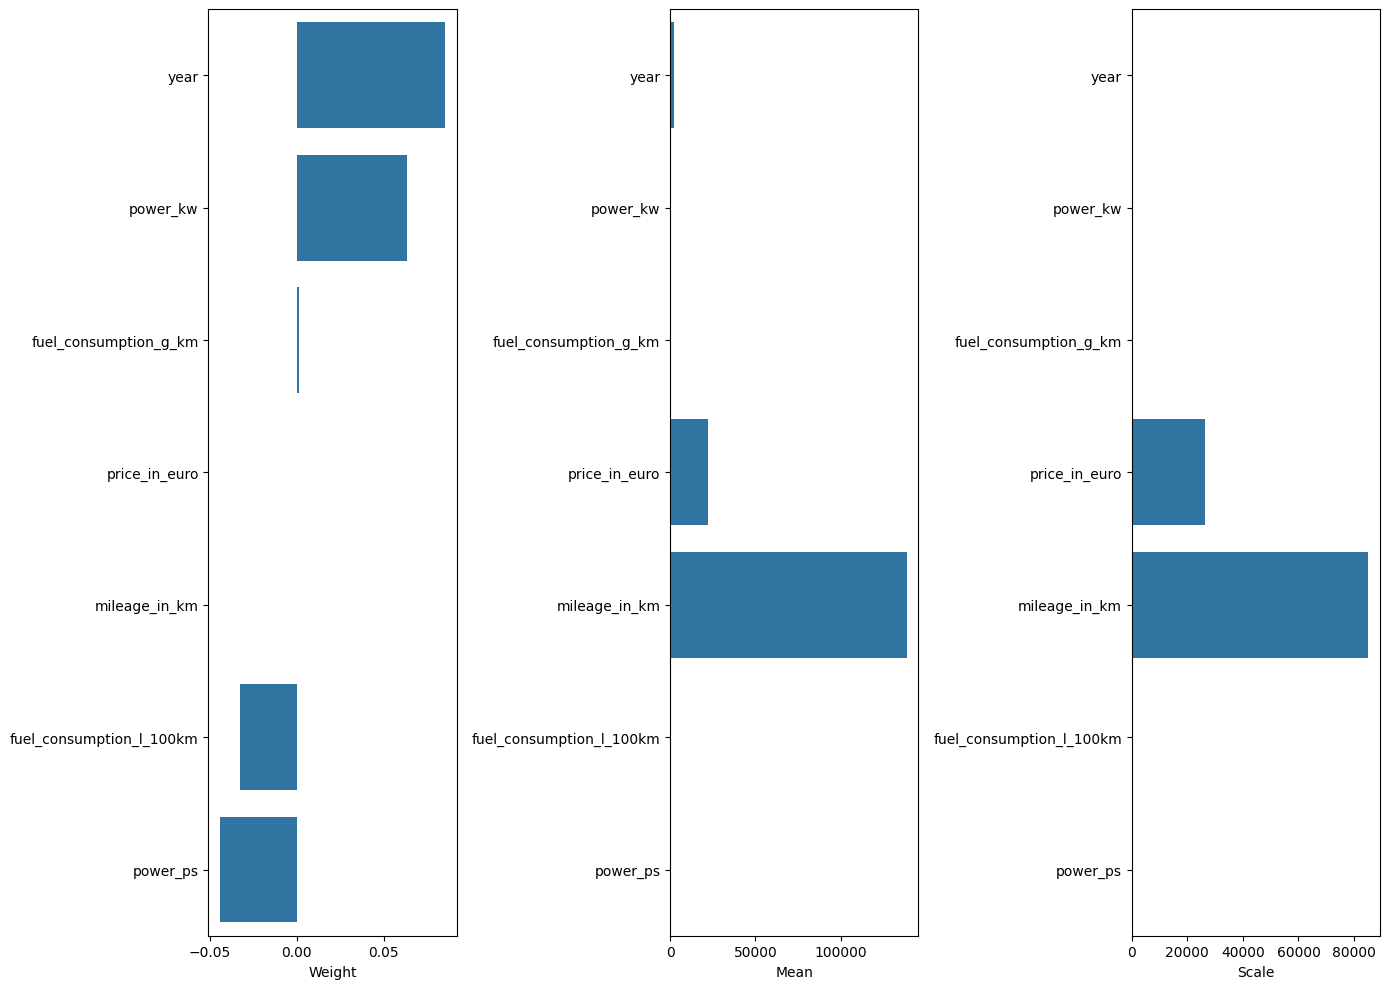

In [ ]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].mean(), X_train[numeric_features].std())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 0.3492
Train RMSE = 0.3146


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best alpha = 0.0100


Text(0, 0.5, 'CV score')

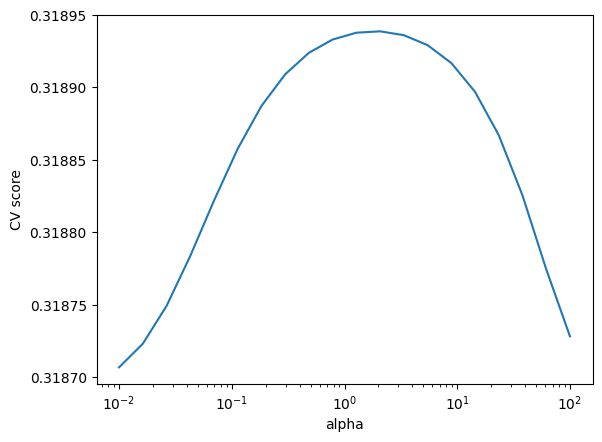

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 2, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.3498


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#2 категор

In [ ]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)

In [ ]:
X_train[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 5663 to 1289
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transmission_type  7000 non-null   object
 1   fuel_type          7000 non-null   object
dtypes: object(2)
memory usage: 164.1+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.3440


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (7000, 9)
Size after OneHot: (7000, 16)


In [ ]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 0.8276


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 16


Best alpha = 0.0028


Text(0, 0.5, 'CV score')

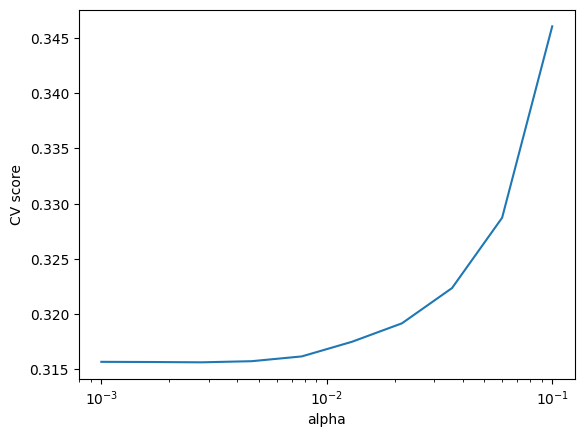

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-3, -1, 10)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.3453


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 8


<ipython-input-91-780c6929b39a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='log_price', ylabel='Density'>

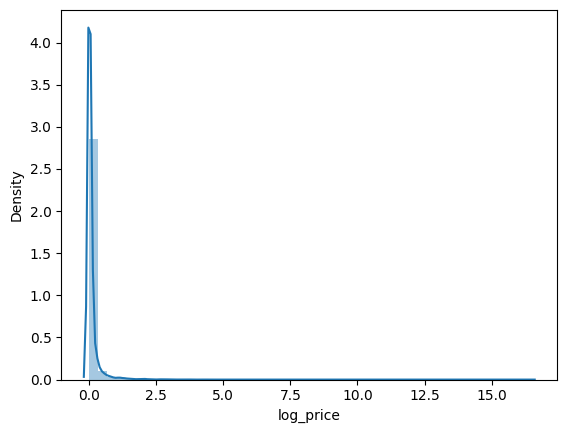

In [ ]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

In [ ]:
mask = (error < np.quantile(error, 0.95))
print(len(mask))
mask.sum()

7000


6650

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.3445


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
X_train = X_train[mask]
y_train = y_train[mask]

<ipython-input-95-2569c1c57f3a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  error = (y_train[mask] - model.predict(X_train[mask])) ** 2
<ipython-input-95-2569c1c57f3a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='log_price', ylabel='Density'>

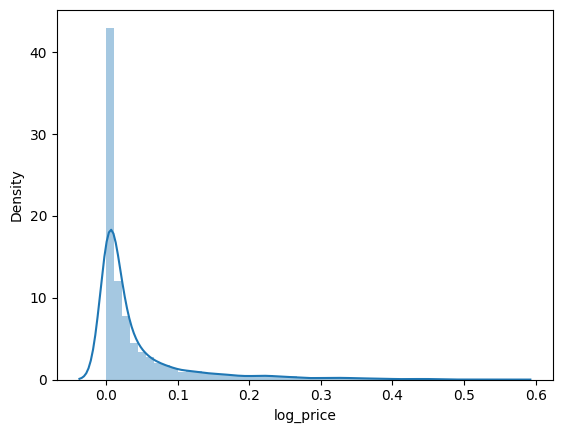

In [ ]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

<ipython-input-96-edc2006b4f48>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = df['log_price'], palette="Set3", data = df)


<Axes: ylabel='log_price'>

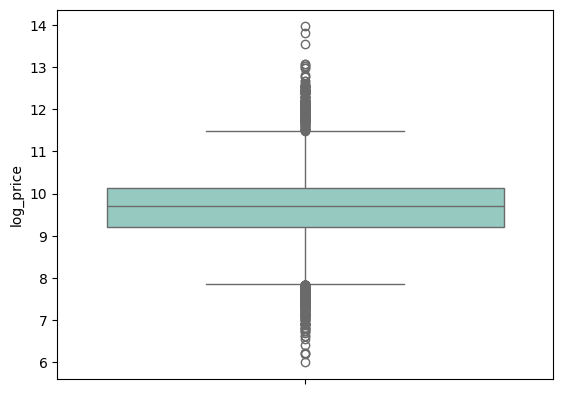

In [ ]:
sns.boxplot(y = df['log_price'], palette="Set3", data = df)

In [ ]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.3438


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
df.groupby('fuel_type')['log_price'].mean()

,log_price
fuel_type,
0,9.682093
1,9.633173
2,10.494966
3,8.815726
6,10.741126
7,10.949051


In [ ]:
df.groupby('power_kw')['log_price'].mean()

,log_price
power_kw,
10,10.307952
45,8.919091
51,12.468052
55,8.221601
57,9.421763
...,...
515,13.165370
519,10.753617
520,12.468322


Text(0.5, 1.0, 'dependence')

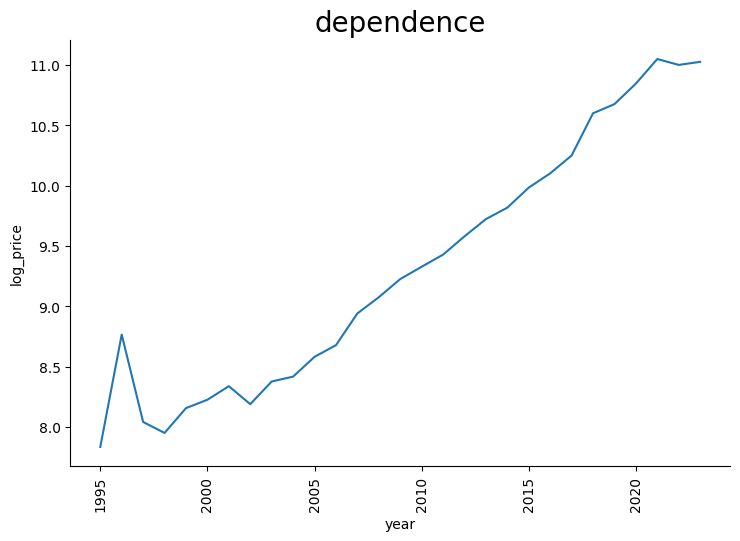

In [ ]:
x = df.groupby('year')['log_price'].mean().index
y = df.groupby('year')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('year')
plt.ylabel('log_price')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)
#'black': '0', 'grey': '1', 'white': '2', 'silver': '3', 'blue': '4', 'red': '5', 'brown': '6', 'green': '7', 'orange': '8', 'beige': '9', 'yellow': '10', 'bronze': '11', 'gold': '12', 'violet': '13'

Text(0.5, 1.0, 'dependence')

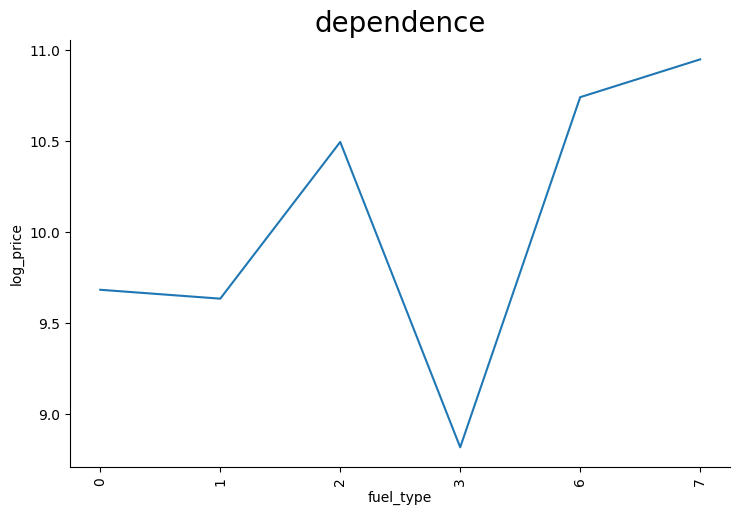

In [ ]:
x = df.groupby('fuel_type')['log_price'].mean().index
y = df.groupby('fuel_type')['log_price'].mean()

sns.relplot(x = x, y = y, aspect=1.5, kind='line')

plt.xlabel('fuel_type')
plt.ylabel('log_price')
plt.xticks(rotation = 90)
plt.title('dependence', fontsize=20)

In [ ]:
numeric_data = X_train.select_dtypes([np.number])
numeric_features = list(numeric_data.columns)
categorical_features = list(X_train.dtypes[X_train.dtypes == "object"].index)

In [ ]:
df

,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,log_price
0,1995,1300,148,201,2,0,10.9,260.0,160500.0,7.170120
1,1995,4900,110,150,2,0,9.5,225.0,189500.0,8.496990
2,1996,7900,110,150,2,0,9.5,225.0,47307.0,8.974618
3,1996,3500,110,150,2,0,8.8,210.0,230000.0,8.160518
4,1996,5500,132,179,2,0,13.4,320.0,168000.0,8.612503
...,...,...,...,...,...,...,...,...,...,...
9995,2017,16830,81,110,1,0,5.4,124.0,100976.0,9.730918
9996,2017,34480,185,252,1,0,6.2,141.0,36100.0,10.448135
9997,2017,48685,445,605,1,0,10.0,231.0,122850.0,10.793126
9998,2017,26990,140,190,2,0,5.7,130.0,115000.0,10.203222


In [ ]:
numeric_features

['year',
 'price_in_euro',
 'power_kw',
 'power_ps',
 'fuel_consumption_l_100km',
 'fuel_consumption_g_km',
 'mileage_in_km']

In [ ]:
df['bias'] = 1

<ipython-input-105-230f908964b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bias'] = 1


In [ ]:
ohe = ['transmission_type', 'fuel_type']
no_ohe_no_scaling = ['bias']

In [ ]:
x = df[numeric_features + ohe + no_ohe_no_scaling]
y = df['log_price']

In [ ]:
no_ohe_no_scaling

['bias']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),
    ('other',  'passthrough', no_ohe_no_scaling),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe)
])

x = column_transformer.fit_transform(x)

In [ ]:
x.shape

(10000, 18)

In [ ]:
feature_names = numeric_features + no_ohe_no_scaling + ['transmission1', 'transmission2', 'transmission3',
'transmission4', 'fuel1', 'fuel2', 'fuel3','fuel4','fuel5','fuel6']
display(feature_names)
len(feature_names)

['year',
 'price_in_euro',
 'power_kw',
 'power_ps',
 'fuel_consumption_l_100km',
 'fuel_consumption_g_km',
 'mileage_in_km',
 'bias',
 'transmission1',
 'transmission2',
 'transmission3',
 'transmission4',
 'fuel1',
 'fuel2',
 'fuel3',
 'fuel4',
 'fuel5',
 'fuel6']

18

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape[0], X_test.shape[0])

8000 2000


In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X_train.shape

(8000, 18)

In [ ]:
y_train.shape

(8000,)

In [ ]:
# Импорт класса LinearRegression из модуля linear_model пакета scikit-learn
from sklearn.linear_model import LinearRegression

# Создание экземпляра класса LinearRegression
simple_lr = LinearRegression()

# Обучение модели
simple_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
simple_lr.coef_

array([ 4.08526881e-01,  1.44295483e-01,  2.94891281e+00, -2.70479414e+00,
        4.41917816e-02,  6.16162731e-03, -1.81156050e-01, -3.25035138e-14,
       -8.60321854e-03,  9.20106526e-02,  9.73457522e-03, -9.31420093e-02,
       -2.22229484e-01, -1.19078255e-01, -2.45586798e-01, -2.30606341e-01,
        2.75479745e-01,  5.42021133e-01])

In [ ]:
predicted_y = simple_lr.predict(X_test)

In [ ]:
len(predicted_y)

2000

In [ ]:
mean_squared_error(y_test, predicted_y)

0.10072450627899648

In [ ]:
r2_score(y_test, predicted_y, multioutput='raw_values')

array([0.86303711])

In [ ]:
multiple_lr = LinearRegression().fit(x, y)

# Сохраняем массив с результатами оценки качества
mse = cross_val_score(multiple_lr,
                     x,
                     y,
                     scoring='neg_mean_squared_error',
                     cv=6)

# Получение среднего значения метрики MSE для оценки качества модели
mse.mean()

-0.14287056129368256

In [ ]:
multiple_lr2 = LinearRegression().fit(x, y)

# Сохраняем массив с результатами оценки качества
r2 = cross_val_score(multiple_lr,
                     x,
                     y,
                     scoring='r2',
                     cv=6)

# Получение среднего значения метрики r2 для оценки качества модели
r2.mean()

0.6737691396216453

In [ ]:
# Сохранение массива, содержащего все десять коэффициентов
multiple_lr_coeffs = multiple_lr.coef_
multiple_lr_coeffs

array([ 4.01293417e-01,  1.45027310e-01,  2.55645540e+00, -2.30957201e+00,
        5.20726456e-02, -4.50953739e-03, -1.93078898e-01, -1.39645240e-14,
       -2.24403328e-03,  8.86197143e-02,  8.58696883e-03, -9.49626499e-02,
       -2.50250805e-01, -1.35644832e-01, -2.71718203e-01, -9.60917083e-02,
        2.58372644e-01,  4.95332905e-01])

In [ ]:
len(multiple_lr_coeffs)

18

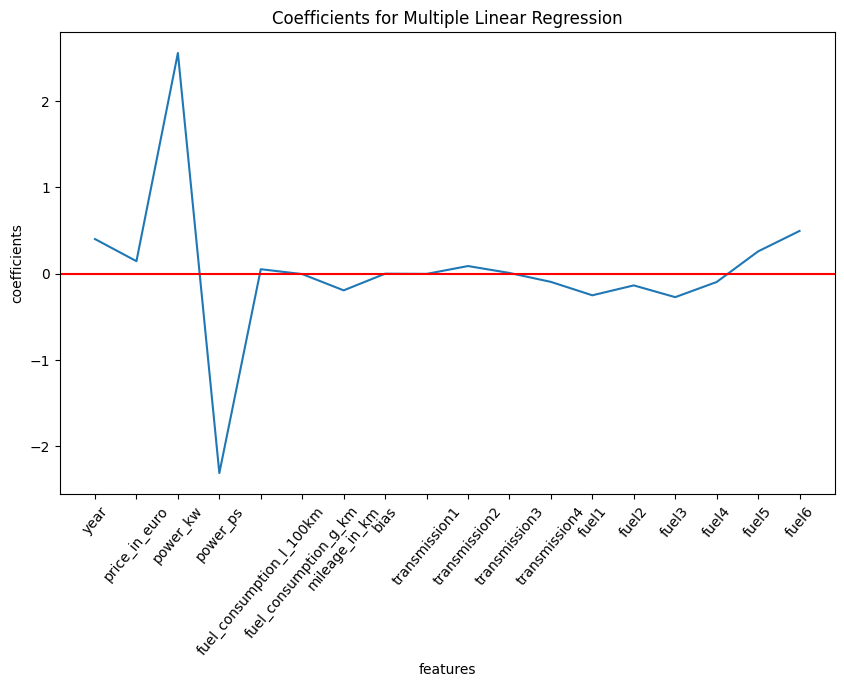

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(multiple_lr_coeffs)), multiple_lr_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import Ridge

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV Ridge-модели, потенциальных альфа-значений,
# метрики качества
ridge = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# обучение модели
ridge.fit(x,y)
print('Лучшее значение alpha:', ridge.best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', ridge.best_score_)

Лучшее значение alpha: {'alpha': 100}
Метрика качества: -0.12692138329681285


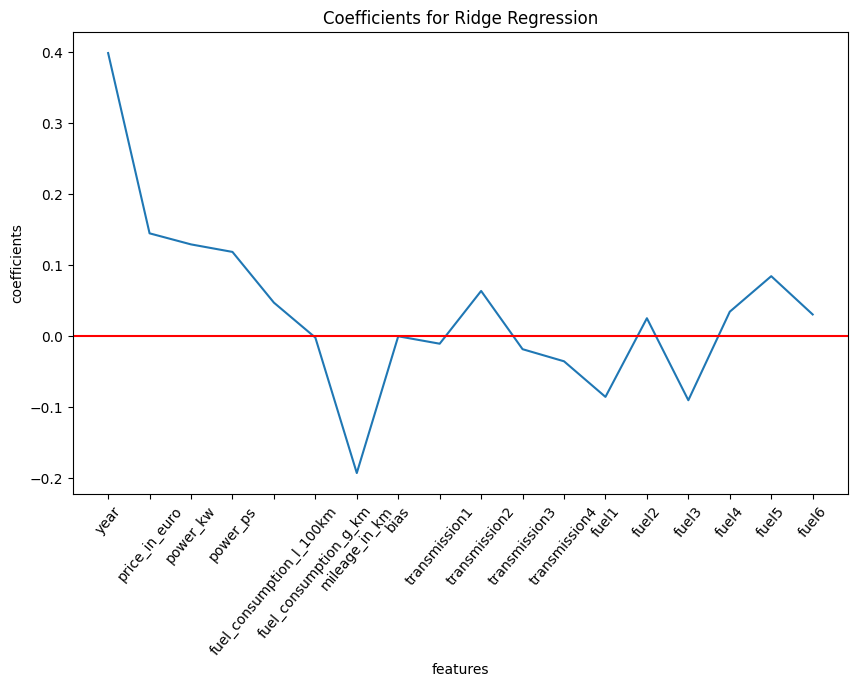

In [ ]:
# Создание объекта, содержащего наилучшую модель
best_ridge_model = Ridge(alpha=20)

# Извлечение оценок коэффициентов для всех десяти признаков
best_ridge_coeffs = best_ridge_model.fit(x, y).coef_

plt.figure(figsize=(10, 6))
plt.plot(range(len(best_ridge_coeffs)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
# Импорт класса Lasso из модуля linear_model scikit-learn
from sklearn.linear_model import Lasso

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
lasso = GridSearchCV(Lasso(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# Обучение модели
lasso.fit(x, y)
print('Лучшее значение alpha:', lasso.best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', lasso.best_score_)

Лучшее значение alpha: {'alpha': 0.05}
Метрика качества: -0.11659370952830535


In [ ]:
# Создание объекта, содержащего наилучшую модель
best_lasso_model = Lasso(alpha=0.04)

# Извлечение оценок коэффициентов для всех десяти признаков
best_lasso_coeffs = best_lasso_model.fit(x, y).coef_

plt.figure(figsize=(10, 6))
plt.plot(range(len(best_lasso_coeffs)), best_lasso_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
# Создание датафрейма, содержащего коэффициенты трёх моделей
comparing_models = pd.DataFrame({'without_regularization': multiple_lr_coeffs,
                                 'Ridge': best_ridge_coeffs,
                                 'Lasso': best_lasso_coeffs},
                                 index=feature_names)

display(comparing_models)

In [ ]:
comparing_models.plot(figsize = (10, 6))
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
# Создание датафрейма, содержащего коэффициенты трёх моделей
comparing_models = pd.DataFrame({'without_regularization': multiple_lr_coeffs,
                                 'Ridge': best_ridge_coeffs,
                                 'Lasso': best_lasso_coeffs},
                                 index=feature_names)

display(comparing_models)

In [ ]:
comparing_models.plot(figsize = (10, 6))
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()